* Họ tên: Hồ Thịnh
* MSSV: 19522274
* Lab 03: Trực quan hoá dữ liệu bản đồ

In [2]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1957, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 1957 (delta 7), reused 1 (delta 1), pack-reused 1911
Receiving objects: 100% (1957/1957), 169.10 MiB | 26.08 MiB/s, done.
Resolving deltas: 100% (1056/1056), done.
Checking out files: 100% (542/542), done.


In [6]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [5]:
df =  gpd.read_file("/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp")
df

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,...,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((682507.505 1189929.778, 682485.431 1..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,...,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((681349.265 1190928.179, 681382.887 1..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,...,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((682877.988 1195927.612, 682969.684 1..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,...,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((680274.980 1198401.860, 680578.965 1..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,...,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((684986.154 1194412.964, 684987.226 1..."


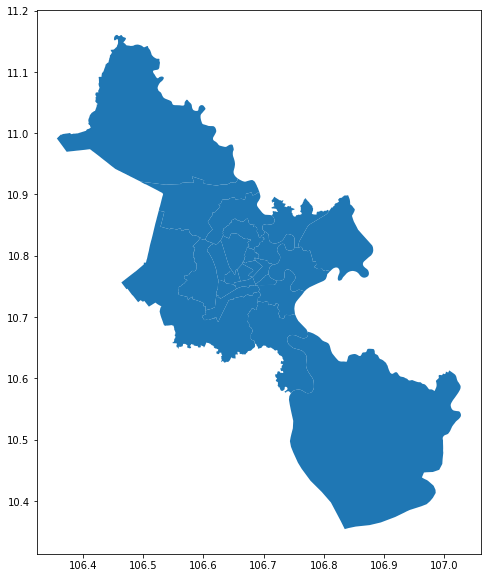

In [16]:
df = df.to_crs(epsg=4326)
df.plot(figsize=(10, 10))
plt.show()

In [25]:
m = folium.Map(location=[10.80, 106.70], zoom_start=10, tiles='CartoDB positron')
for _, r in df.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)

m